In [11]:
import json_helper
import pandas as pd
import os 

In [12]:
import json_helper

# use json_helper to load all json objects into a dataframe called df_daily_summaries
df_daily_summaries = json_helper.load_multiple_json_files("data/daily_summaries/daily_summaries_*.json")

Found 2 files matching pattern: data/daily_summaries/daily_summaries_*.json
Loading: data/daily_summaries/daily_summaries_FIPS10003_jan_2018_0.json
  Loaded 1000 records
Loading: data/daily_summaries/daily_summaries_FIPS10003_jan_2018_1.json
  Loaded 386 records

Combined 1386 total records from 2 files


In [26]:
# display a summary of df_daily_summaries
json_helper.summarize_dataframe(df_daily_summaries, "Daily Summaries DataFrame Summary")



Daily Summaries DataFrame Summary
Shape: (1386, 6)
Columns: ['date', 'datatype', 'station', 'attributes', 'value', 'source_file']

Data types:
date           object
datatype       object
station        object
attributes     object
value           int64
source_file    object
dtype: object

First few rows:
                  date datatype            station attributes  value  \
0  2018-01-01T00:00:00     PRCP  GHCND:US1DENC0001   ,,N,0700      0   
1  2018-01-01T00:00:00     SNWD  GHCND:US1DENC0001  T,,N,0700      0   
2  2018-01-01T00:00:00     PRCP  GHCND:US1DENC0002   ,,N,0700      0   
3  2018-01-01T00:00:00     SNOW  GHCND:US1DENC0002   ,,N,0700      0   
4  2018-01-01T00:00:00     SNWD  GHCND:US1DENC0002  T,,N,0700      0   

              source_file  
0  daily_summaries_*.json  
1  daily_summaries_*.json  
2  daily_summaries_*.json  
3  daily_summaries_*.json  
4  daily_summaries_*.json  

Missing values:
date           0
datatype       0
station        0
attributes     0
value  

How many stations are there in total for FIPS10003

In [28]:
# Count unique stations for FIPS10003
unique_stations = df_daily_summaries['station'].nunique()
print(f"Total number of stations for FIPS10003: {unique_stations}")


Total number of stations for FIPS10003: 17


Create a DataFrame called temps_max that only contains the entries from df_daily_summaries where the datatype column is equal to TMAX. This DataFrame should only retain the date column and the value column.

In [ ]:
# Create DataFrame with only TMAX entries, keeping date and value columns
temps_max = df_daily_summaries[df_daily_summaries['datatype'] == 'TMAX'][['date', 'value']].copy()
print(f"Created temps_max DataFrame with {len(temps_max)} records")


Created temps_max DataFrame with 31 records
Number of entries in temps_max: 31
Mean temperature (tenths of °C): 48.2


In [33]:
temps_max

,date,value
42,2018-01-01T00:00:00,-60
89,2018-01-02T00:00:00,-38
138,2018-01-03T00:00:00,-5
193,2018-01-04T00:00:00,-21
240,2018-01-05T00:00:00,-82
279,2018-01-06T00:00:00,-88
322,2018-01-07T00:00:00,-71
365,2018-01-08T00:00:00,6
399,2018-01-09T00:00:00,78
443,2018-01-10T00:00:00,56


How many entries are there in the temps_max DataFrame? What are the mean, min, and max values?

In [34]:
# Analyze temps_max DataFrame
print(f"Number of entries in temps_max: {len(temps_max)}")
print(f"Mean temperature (tenths of °C): {temps_max['value'].mean():.1f}")
print(f"Min temperature (tenths of °C): {temps_max['value'].min()}")
print(f"Max temperature (tenths of °C): {temps_max['value'].max()}")
print()
print("In Celsius:")
print(f"Mean temperature: {temps_max['value'].mean() / 10:.1f}°C")
print(f"Min temperature: {temps_max['value'].min() / 10:.1f}°C") 
print(f"Max temperature: {temps_max['value'].max() / 10:.1f}°C")

Number of entries in temps_max: 31
Mean temperature (tenths of °C): 48.2
Min temperature (tenths of °C): -88
Max temperature (tenths of °C): 172

In Celsius:
Mean temperature: 4.8°C
Min temperature: -8.8°C
Max temperature: 17.2°C


Let's graph this DataFrame so we can get a visual representation for this information.

In [35]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [36]:
%matplotlib inline

In [37]:
x = temps_max['date'].str[8:10]
y = temps_max['value'] / 10

[Text(0.5, 0, 'day of month'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Max Temperatues Jan 2018')]

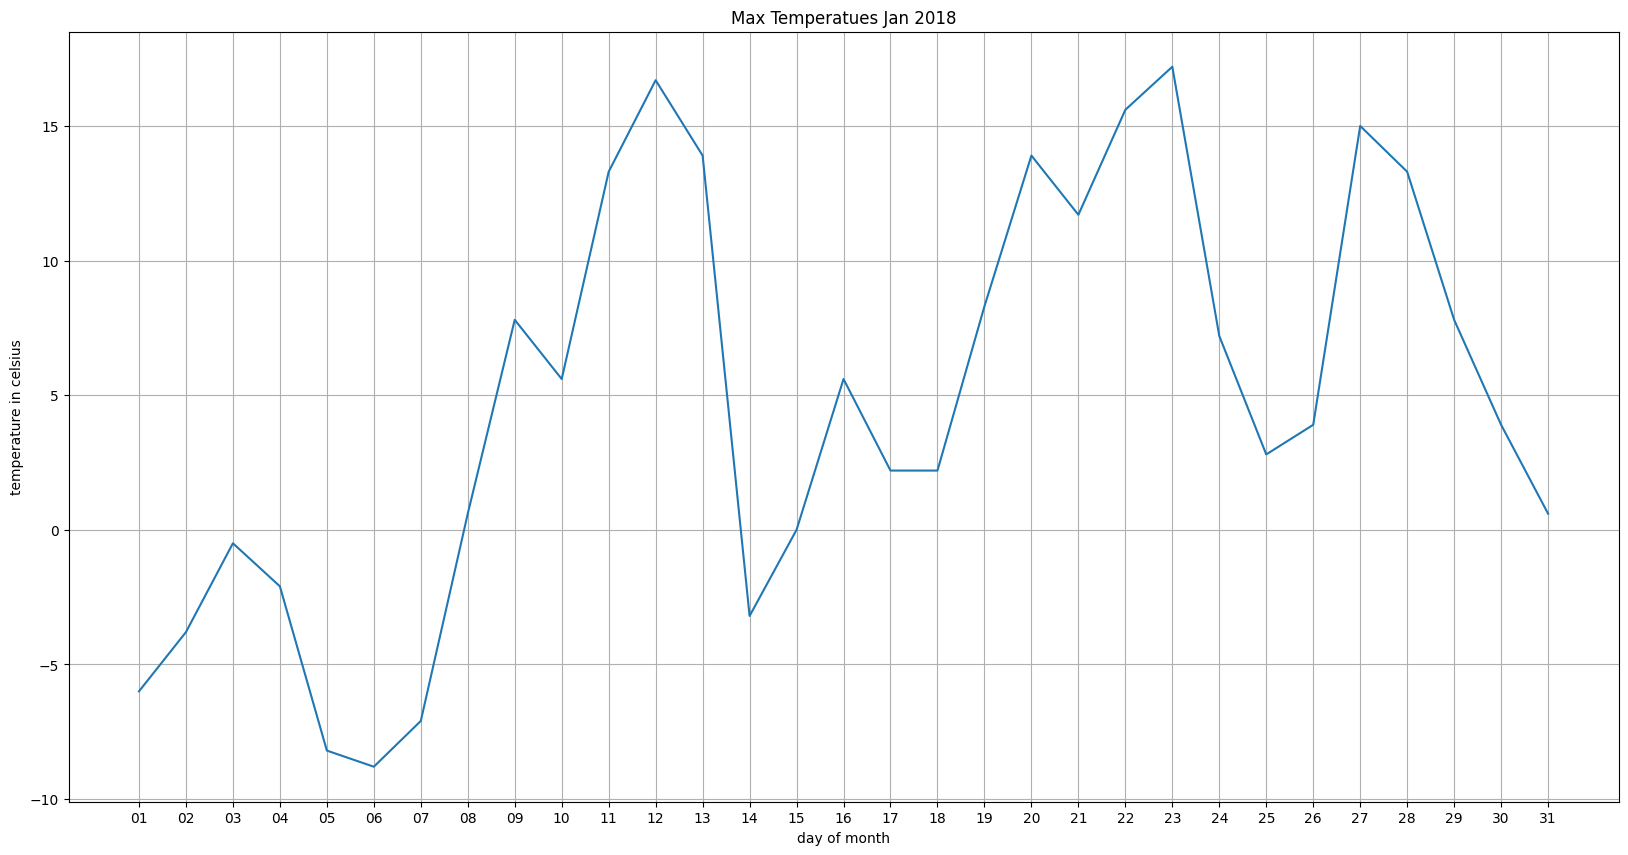

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, y)
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Max Temperatues Jan 2018')

Create a DataFrame called temps_min that only contains the entries from df_daily_summaries where the datatype column is equal to TMIN. This DataFrame should only retain the date column and the value column.

In [44]:
# Create DataFrame with only TMIN entries, keeping date and value columns
temps_min = df_daily_summaries[df_daily_summaries['datatype'] == 'TMIN'][['date', 'value']].copy()
print(f"Created temps_min DataFrame with {len(temps_min)} records")

Created temps_min DataFrame with 31 records


In [ ]:
temps_min


,date,value
43,2018-01-01T00:00:00,-149
90,2018-01-02T00:00:00,-116
139,2018-01-03T00:00:00,-132
194,2018-01-04T00:00:00,-93
241,2018-01-05T00:00:00,-121
280,2018-01-06T00:00:00,-138
323,2018-01-07T00:00:00,-166
366,2018-01-08T00:00:00,-105
400,2018-01-09T00:00:00,-60
444,2018-01-10T00:00:00,-49


How many entries are there in the temps_min DataFrame? What are the mean, min, and max values?

In [46]:
# Analyze temps_min DataFrame
print(f"Number of entries in temps_min: {len(temps_min)}")
print(f"Mean temperature (tenths of °C): {temps_min['value'].mean():.1f}")
print(f"Min temperature (tenths of °C): {temps_min['value'].min()}")
print(f"Max temperature (tenths of °C): {temps_min['value'].max()}")
print()
print("In Celsius:")
print(f"Mean temperature: {temps_min['value'].mean() / 10:.1f}°C")
print(f"Min temperature: {temps_min['value'].min() / 10:.1f}°C")
print(f"Max temperature: {temps_min['value'].max() / 10:.1f}°C")

Number of entries in temps_min: 31
Mean temperature (tenths of °C): -55.2
Min temperature (tenths of °C): -166
Max temperature (tenths of °C): 83

In Celsius:
Mean temperature: -5.5°C
Min temperature: -16.6°C
Max temperature: 8.3°C


Graph the temps_min DataFrame

[Text(0.5, 0, 'day of month'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Min Temperatures Jan 2018')]

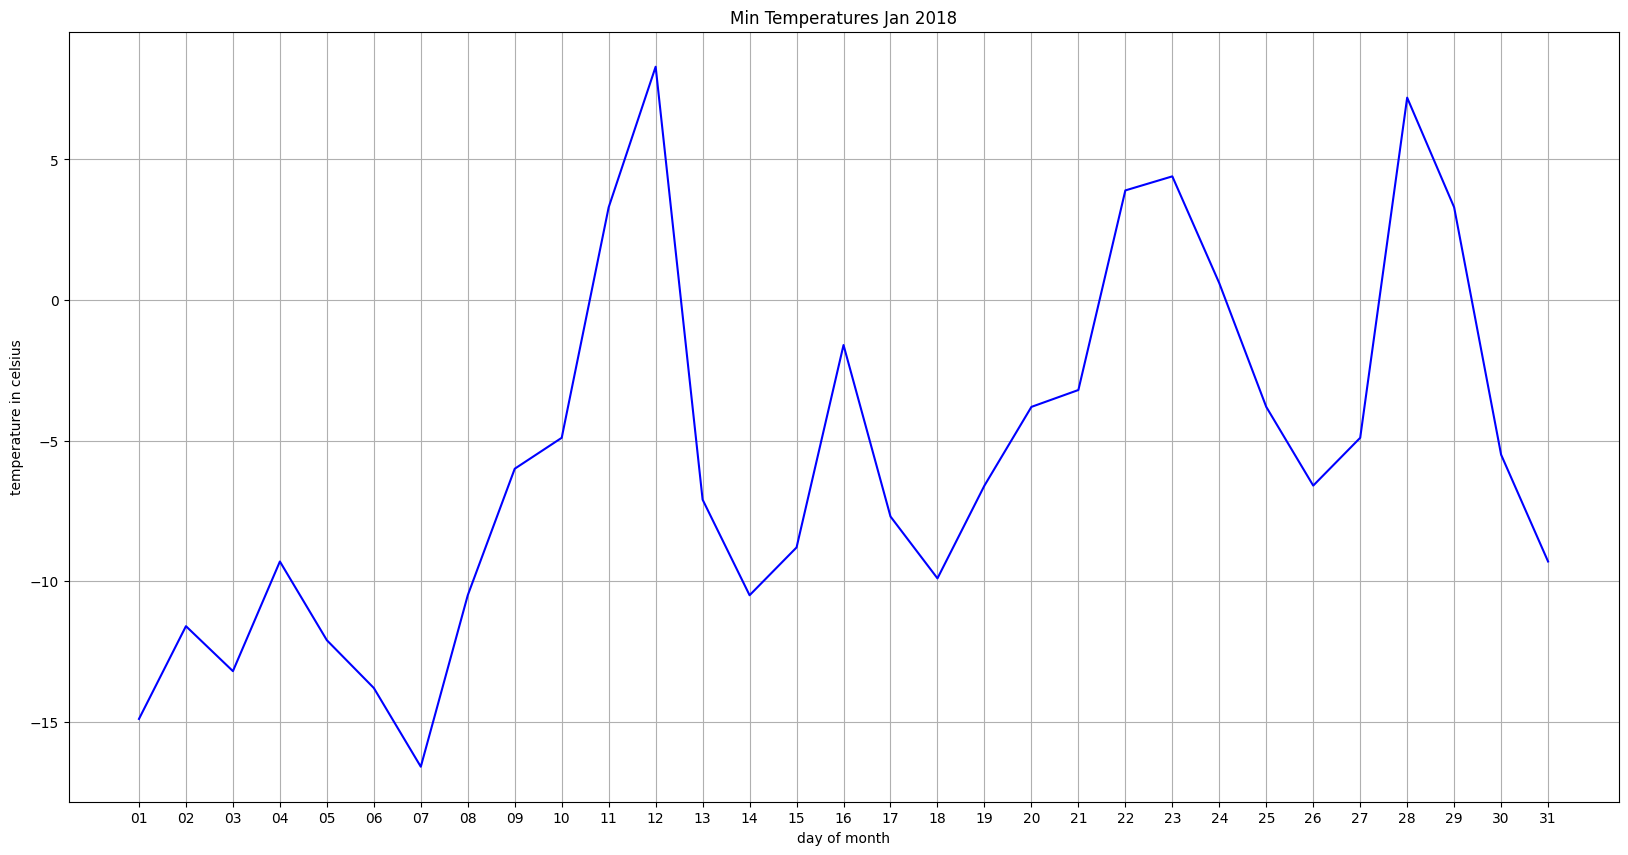

In [48]:
# Graph temps_min DataFrame
x_min = temps_min['date'].str[8:10]
y_min = temps_min['value'] / 10

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x_min, y_min, color='blue')
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Min Temperatures Jan 2018')

We can also plot both of these lines in the same graph.

Text(0.02, 0.98, 'Max Temp: 63.0°F (17.2°C) (Day 23)\nMin Temp: 2.1°F (-16.6°C) (Day 07)\nMonthly Avg: 31.4°F (-0.4°C)')

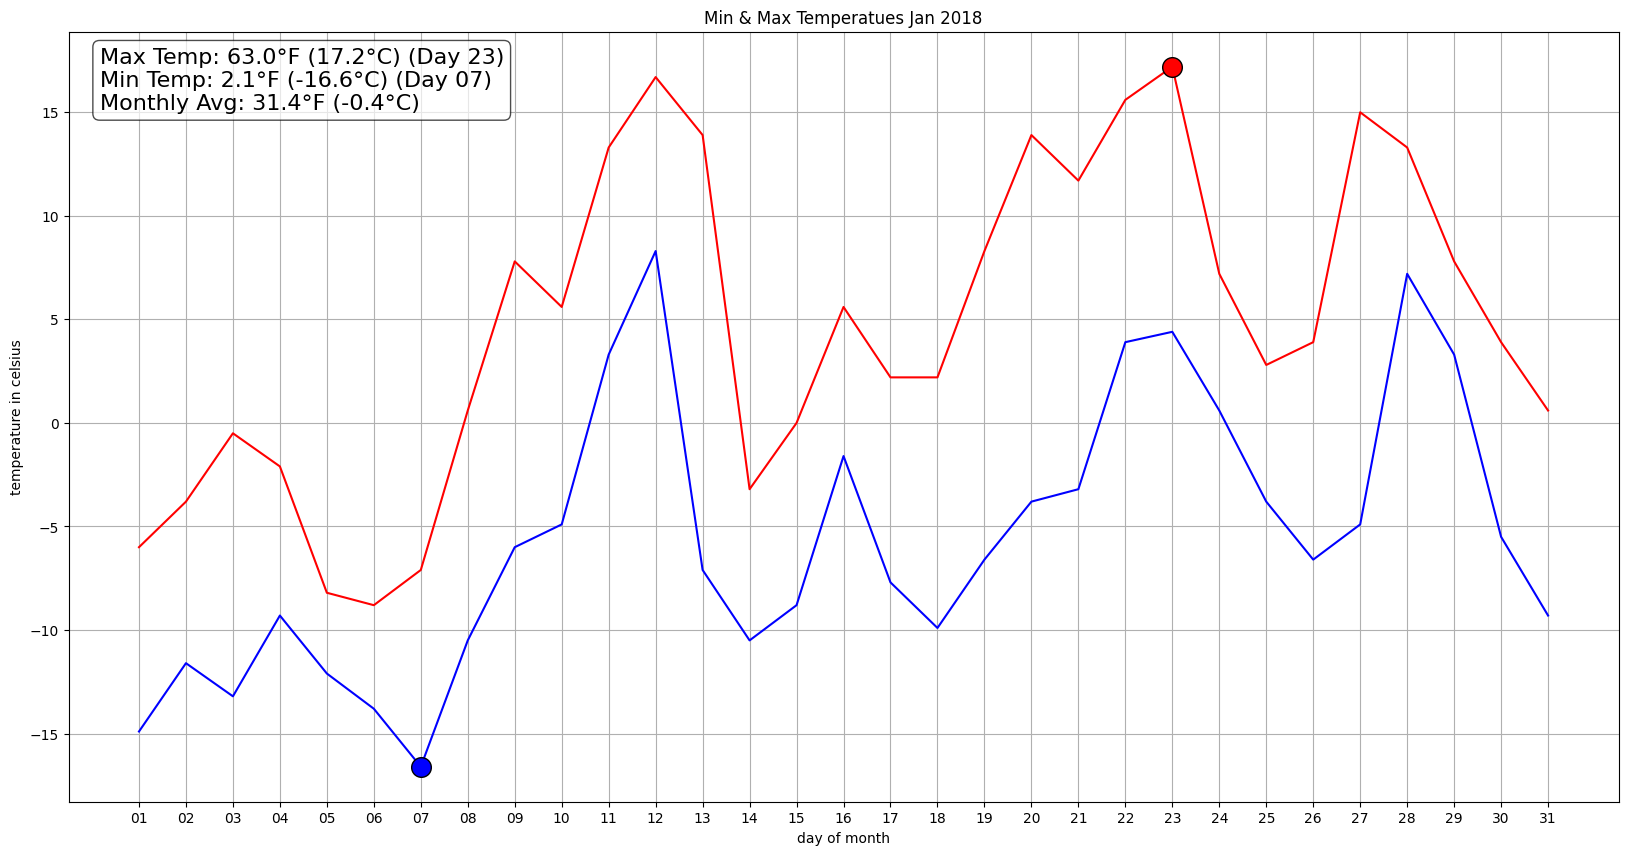

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, temps_max['value'] / 10, color='red')
ax.plot(x, temps_min['value'] / 10, color='blue')
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Min & Max Temperatues Jan 2018')
# Calculate statistics
max_temp = temps_max['value'].max() / 10
min_temp = temps_min['value'].min() / 10
avg_temp = ((temps_max['value'].mean() + temps_min['value'].mean()) / 2) / 10

# Create annotation string
# Find the day for max temp and min temp
max_temp_day = temps_max.loc[temps_max['value'].idxmax()]['date'][8:10]
min_temp_day = temps_min.loc[temps_min['value'].idxmin()]['date'][8:10]

# Convert temperatures to Fahrenheit
max_temp_f = max_temp * 9/5 + 32
min_temp_f = min_temp * 9/5 + 32
avg_temp_f = avg_temp * 9/5 + 32

details = (
    f"Max Temp: {max_temp_f:.1f}°F ({max_temp:.1f}°C) (Day {max_temp_day})\n"
    f"Min Temp: {min_temp_f:.1f}°F ({min_temp:.1f}°C) (Day {min_temp_day})\n"
    f"Monthly Avg: {avg_temp_f:.1f}°F ({avg_temp:.1f}°C)"
)

# Add circles for max and min temperatures
ax.scatter(max_temp_day, max_temp, color='red', s=200, edgecolor='black', zorder=5, label='Max Temp')
ax.scatter(min_temp_day, min_temp, color='blue', s=200, edgecolor='black', zorder=5, label='Min Temp')

# Add annotation to the plot
ax.text(
    0.02, 0.98, details,
    transform=ax.transAxes,
    fontsize=16,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.7)
)